### What is Reinforcement Learning?

Reinforcement learning is a sub-branch of Machine Learning that trains a model to return an optimum solution for a problem by taking a sequence of decisions by itself. 

We model an environment after the problem statement. The model interacts with this environment and comes up with solutions all on its own, without human interference. To push it in the right direction, we simply give it a positive reward if it performs an action that brings it closer to its goal or a negative reward if it goes away from its goal. 

To understand reinforcement learning better, consider a dog that we have to house train. Here, the dog is the agent and the house, the environment.

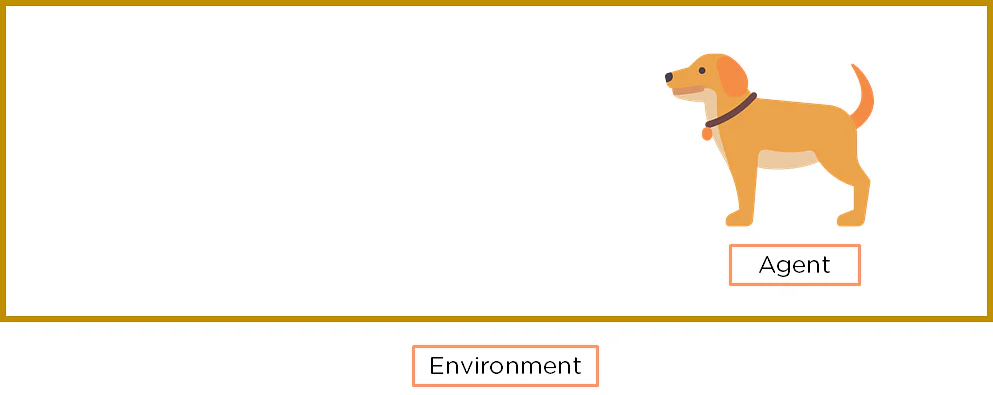

                                            Figure 1: Agent and Environment 

We can get the dog to perform various actions by offering incentives such as dog biscuits as a reward.

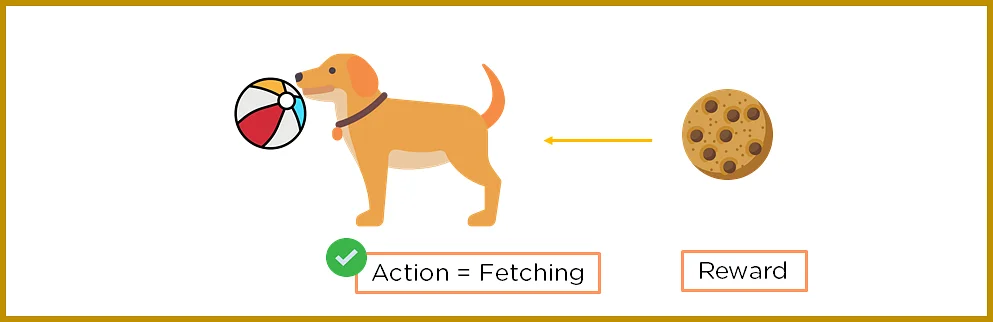

                                                Figure 2: Performing an Action and getting Reward

The dog will follow a policy to maximize its reward and hence will follow every command and might even learn a new action, like begging, all by itself.

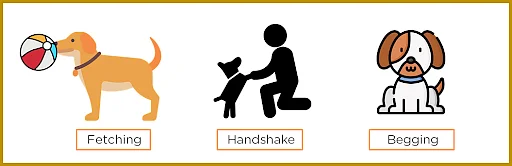

                                                Figure 3: Learning new actions

The dog will also want to run around and play and explore its environment. This quality of a model is called Exploration. The tendency of the dog to maximize rewards is called Exploitation. There is always a tradeoff between exploration and exploitation, as exploration actions may lead to lesser rewards.

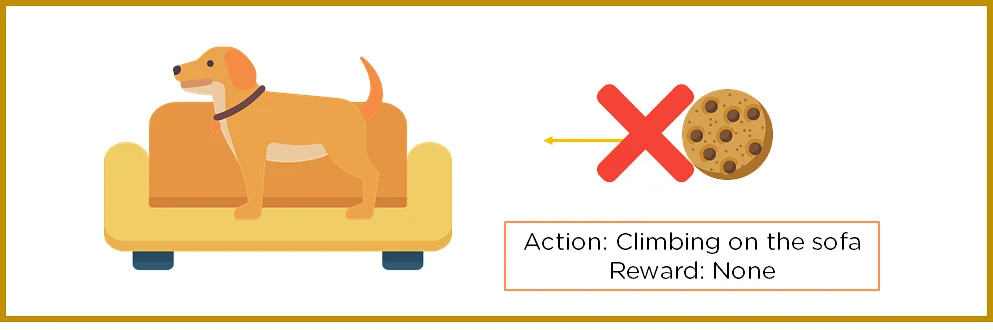

                                                Figure 4: Exploration vs Exploitation
                                                
### Supervised vs Unsupervised vs Reinforcement Learning

The below table shows the differences between the three main sub-branches of machine learning.

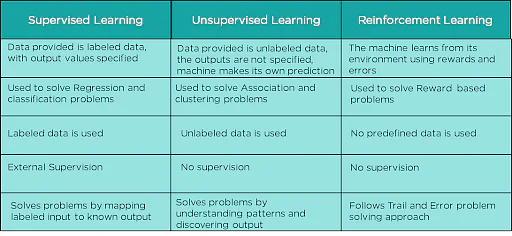

        Table 1: Differences between Supervised, Unsupervised, and Reinforcement Learning

### Important Terms in Reinforcement Learning

Agent: Agent is the model that is being trained via reinforcement learning

Environment: The training situation that the model must optimize to is called its environment

Action: All possible steps that can be taken by the model  

State: The current position/ condition returned by the model

Reward: To help the model move in the right direction, it is rewarded/points are given to it to appraise some action
Policy: Policy determines how an agent will behave at any time. It acts as a mapping between Action and present State

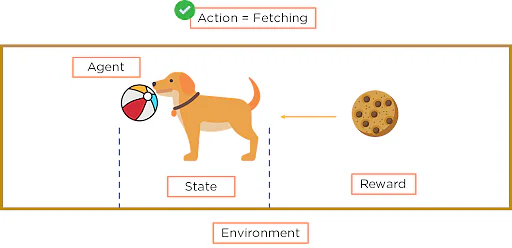

                                   Figure 5: Important terms in Reinforcement Learning

### What is Markov’s Decision Process?

Markov’s Decision Process is a Reinforcement Learning policy used to map a current state to an action where the agent continuously interacts with the environment to produce new solutions and receive rewards

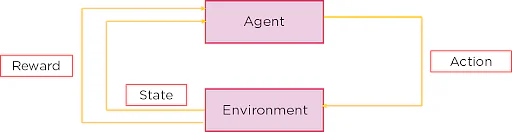

                                  Figure 6: Markov’s Decision Process

 First, let's understand Markov’s Process. Markov’s Process states that the future is independent of the past, given the present. This means that, given the present state, the next state can be predicted easily, without the need for the previous state.

This theory is used by Markov’s Decision Process to get the next action in our machine learning model. Markov’s Decision Process (MDP) uses:

A set of States (S)

A set of Models

A set of all possible actions (A)

A reward function that depends on the state and action R( S, A )

A policy which is the solution of MDP

The policy of Markov’s Decision Process aims to maximize the reward at each state. The Agent interacts with the Environment and takes Action while it is at one State to reach the next future State. We base the action on the maximum Reward returned.

In the diagram shown, we need to find the shortest path between node A and D. Each path has a reward associated with it, and the path with maximum reward is what we want to choose. The nodes; A, B, C, D; denote the nodes. To travel from node to node (A to B) is an action. The reward is the cost at each path, and policy is each path taken. 

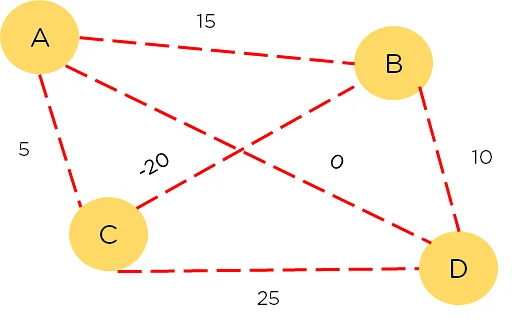

                                              Figure 7: Nodes to traverse

The process will maximize the output based on the reward at each step and will traverse the path with the highest reward. This process does not explore but maximizes reward. 

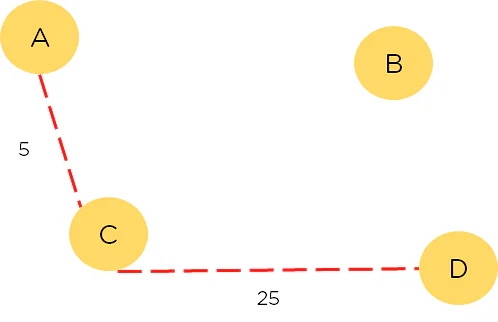

                                  Figure 8: Path taken by MDP

In [1]:
# !pip install stable-baselines3[extra]

### Stable-Baselines3 Docs - Reliable Reinforcement Learning Implementations¶
Stable Baselines3 (SB3) is a set of reliable implementations of reinforcement learning algorithms in PyTorch. It is the next major version of Stable Baselines.

Github repository: https://github.com/DLR-RM/stable-baselines3

Paper: https://jmlr.org/papers/volume22/20-1364/20-1364.pdf

RL Baselines3 Zoo (training framework for SB3): https://github.com/DLR-RM/rl-baselines3-zoo

RL Baselines3 Zoo provides a collection of pre-trained agents, scripts for training, evaluating agents, tuning hyperparameters, plotting results and recording videos.

SB3 Contrib (experimental RL code, latest algorithms): https://github.com/Stable-Baselines-Team/stable-baselines3-contrib

Main Features¶
Unified structure for all algorithms

PEP8 compliant (unified code style)

Documented functions and classes

Tests, high code coverage and type hints

Clean code

Tensorboard support

The performance of each algorithm was tested (see Results section in their respective page)

### Import Dependencies

In [2]:
import gym 
import os
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

C:\Users\Sandesh\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


### Description

    This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson in
    ["Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem"](https://ieeexplore.ieee.org/document/6313077).
    
    A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track.
    
    The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces
     in the left and right direction on the cart.
     
    ### Action Space
    
    The action is a `ndarray` with shape `(1,)` which can take values `{0, 1}` indicating the direction
     of the fixed force the cart is pushed with.
     
    | Num | Action                 |
    |-----|------------------------|
    | 0   | Push cart to the left  |
    | 1   | Push cart to the right |
    
    **Note**: The velocity that is reduced or increased by the applied force is not fixed and it depends on the angle
     the pole is pointing. The center of gravity of the pole varies the amount of energy needed to move the cart underneath it
     
    ### Observation Space
    
    The observation is a `ndarray` with shape `(4,)` with the values corresponding to the following positions and velocities:
    
    | Num | Observation           | Min                 | Max               |
    |-----|-----------------------|---------------------|-------------------|
    | 0   | Cart Position         | -4.8                | 4.8               |
    | 1   | Cart Velocity         | -Inf                | Inf               |
    | 2   | Pole Angle            | ~ -0.418 rad (-24°) | ~ 0.418 rad (24°) |
    | 3   | Pole Angular Velocity | -Inf                | Inf               |
    
    **Note:** While the ranges above denote the possible values for observation space of each element,
        it is not reflective of the allowed values of the state space in an unterminated episode. Particularly:
    -  The cart x-position (index 0) can be take values between `(-4.8, 4.8)`, but the episode terminates
       if the cart leaves the `(-2.4, 2.4)` range.
       
    -  The pole angle can be observed between  `(-.418, .418)` radians (or **±24°**), but the episode terminates
       if the pole angle is not in the range `(-.2095, .2095)` (or **±12°**)
       
    ### Rewards
    
    Since the goal is to keep the pole upright for as long as possible, a reward of `+1` for every step taken,
    including the termination step, is allotted. The threshold for rewards is 475 for v1.
    ### Starting State
    
    All observations are assigned a uniformly random value in `(-0.05, 0.05)`
    
    ### Episode End
    The episode ends if any one of the following occurs:
    1. Termination: Pole Angle is greater than ±12°
    2. Termination: Cart Position is greater than ±2.4 (center of the cart reaches the edge of the display)
    3. Truncation: Episode length is greater than 500 (200 for v0)


### Load Environment

In [3]:
environment_name = "CartPole-v0"

In [4]:
env = gym.make(environment_name)

In [5]:
env

<TimeLimit<CartPoleEnv<CartPole-v0>>>

In [6]:
# !pip install pyglet==1.5.27

In [7]:
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:11.0
Episode:2 Score:24.0
Episode:3 Score:11.0
Episode:4 Score:30.0
Episode:5 Score:9.0


### Understanding The Environment
https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py

In [8]:
# 0-push cart to left, 1-push cart to the right
env.action_space.sample()

0

In [9]:
# [cart position, cart velocity, pole angle, pole angular velocity]
env.observation_space.sample()

array([-1.6020588e+00, -1.8095578e+38, -4.5595296e-02,  1.5551216e+38],
      dtype=float32)

###  Train an RL Model

In [10]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])
model = PPO('MlpPolicy', env, verbose = 1)

Using cpu device


In [11]:
model.learn(total_timesteps=20000)

-----------------------------
| time/              |      |
|    fps             | 2282 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1478        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010282733 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 1.62e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 7.74        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.019      |
|    value_loss           | 48.9        |
-----------------------------------------
----------------------------------

### Save and Reload Model

In [12]:
PPO_path = os.path.join('Training', 'Saved Models', 'PPO_model')

In [13]:
model.save(PPO_path)

In [16]:
# Loading saved model
model = PPO.load('Training/Saved Models/PPO_model', env=env)

### Evaluation

In [17]:
from stable_baselines3.common.evaluation import evaluate_policy

In [18]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

C:\Users\Sandesh\AppData\Local\Programs\Python\Python310\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(200.0, 0.0)

In [19]:
env.close()

### Test Model

In [20]:
obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
    if done: 
        print('info', info)
        break

info [{'TimeLimit.truncated': True, 'terminal_observation': array([ 0.36345148, -0.03804733,  0.01469598,  0.22223282], dtype=float32)}]


In [21]:
env.close()

In [23]:
log_path = os.path.join('Training', 'Logs')

### Viewing Logs in Tensorboard

In [24]:
training_log_path = os.path.join(log_path, 'PPO_3')

In [25]:
!tensorboard --logdir={training_log_path}

^C


### Adding a callback to the training Stage

In [26]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
import os

In [27]:
save_path = os.path.join('Training', 'Saved Models')
log_path = os.path.join('Training', 'Logs')

In [28]:
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env])

In [29]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=190, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best=stop_callback, 
                             eval_freq=10000, 
                             best_model_save_path=save_path, 
                             verbose=1)

In [30]:
model = PPO('MlpPolicy', env, verbose = 1, tensorboard_log=log_path)

Using cpu device


In [31]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training\Logs\PPO_1
-----------------------------
| time/              |      |
|    fps             | 1665 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 984         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010415928 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | -0.00767    |
|    learning_rate        | 0.0003      |
|    loss                 | 7.35        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0178     |
|    value_loss           | 48.8        |
-----------------------------------------
---

In [32]:
model_path = os.path.join('Training', 'Saved Models', 'best_model')
model = PPO.load(model_path, env=env)

In [33]:
evaluate_policy(model, env, n_eval_episodes=10, render=True)

(199.3, 2.0999999999999996)

In [35]:
env.close()